[Reference](https://medium.com/geekculture/joypy-one-function-ridgeline-plot-package-bd46a2bb16ef)

In [1]:
pip install joypy

In [2]:
import joypy
import pandas as pd

iris = pd.read_csv("https://raw.githubusercontent.com/leotac/joypy/master/data/iris.csv")

In [7]:
# # Optionally, can be replaced with:
# iris, y = load_iris(as_frame=True, return_X_y=True)
# iris.columns = ["SepalLength","SepalWidth","PetalLength","PetalWidth"]
# iris["Name"] = y.replace([0,1,2], ['setosa', 'versicolor', 'virginica'])

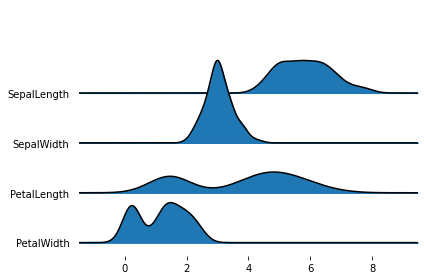

In [8]:
%matplotlib inline
fig, axes = joypy.joyplot(iris)

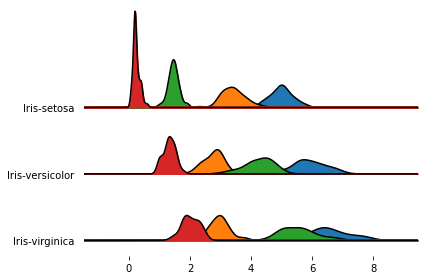

In [9]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name")

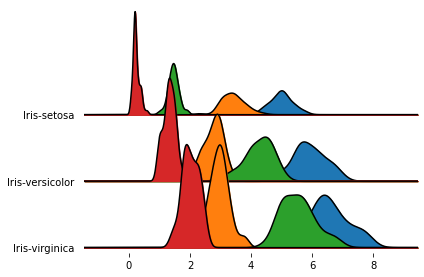

In [10]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", ylim='own')

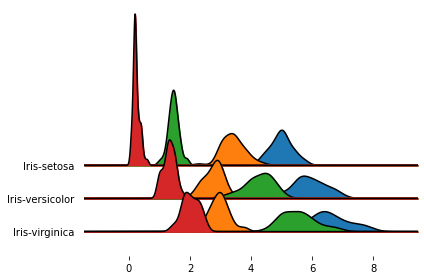

In [11]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", overlap=3)

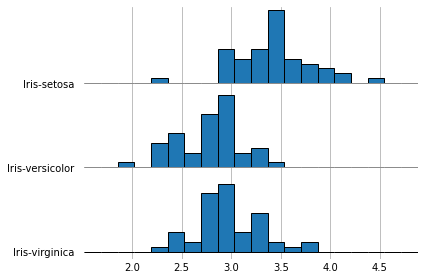

In [12]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", column="SepalWidth",
                          hist=True, bins=20, overlap=0,
                          grid=True, legend=False)


In [13]:
%matplotlib inline

temp = pd.read_csv("https://raw.githubusercontent.com/leotac/joypy/master/data/daily_temp.csv",comment="%")
temp.head()

,Date Number,Year,Month,Day,Day of Year,Anomaly
0,1880.001,1880,1,1,1,-0.808
1,1880.004,1880,1,2,2,-0.670
2,1880.007,1880,1,3,3,-0.740
3,1880.010,1880,1,4,4,-0.705
4,1880.012,1880,1,5,5,-0.752


In [16]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          colormap=cm.autumn_r)

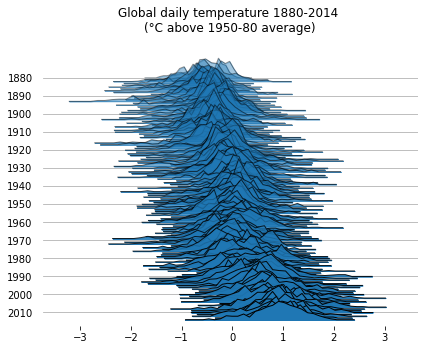

In [15]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          kind="counts", bins=30)

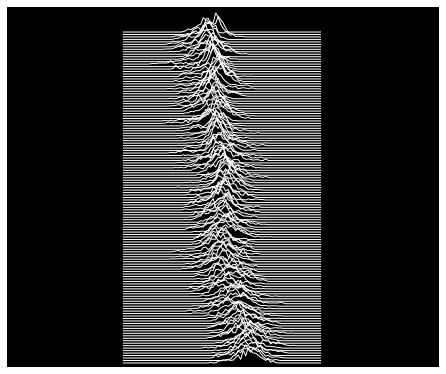

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = joypy.joyplot(temp,by="Year", column="Anomaly", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(6,5),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])      

In [20]:
players = pd.read_csv("https://raw.githubusercontent.com/leotac/joypy/master/data/Players.csv",index_col=0)
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [21]:
seasons = pd.read_csv("https://raw.githubusercontent.com/leotac/joypy/master/data/Seasons_Stats.csv", index_col=0)
seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [22]:
joined = seasons.merge(players, on="Player")
threepoints = joined[(joined.Year > 1979) & (joined["FGA"] > 10)].sort_values("Year")
threepoints["3Pfract"] = threepoints["3PA"]/threepoints.FGA

In [25]:
%matplotlib inline

decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoints.Year.unique()]
fig, axes = joypy.joyplot(threepoints, by="Year", column="3Pfract",
                  kind="kde", 
                  range_style='own', tails=0.2, 
                  overlap=3, linewidth=1, colormap=cm.autumn_r,
                  labels=decades, grid='y', figsize=(7,7), 
                  title="Fraction of 3 pointers \n over all field goal attempts")

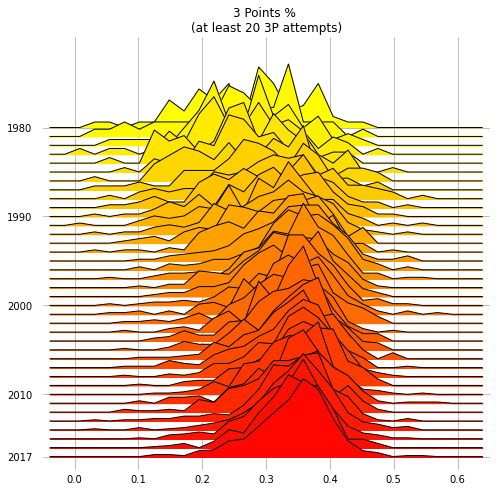

In [29]:
from matplotlib import cm

%matplotlib inline

threepoint_shooters = threepoints[threepoints["3PA"] >= 20] 
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoint_shooters.Year.unique()]
fig, axes = joypy.joyplot(threepoint_shooters, by="Year", column="3P%",
                   kind="normalized_counts", bins=30, 
                   range_style='all', x_range=[-0.05,0.65],
                   overlap=2, linewidth=1, colormap=cm.autumn_r,
                   labels=decades, grid='both', figsize=(7,7),
                   title="3 Points % \n(at least 20 3P attempts)")

         date  G     ratio
0  2021-07-01  0  0.016220
1  2021-07-01  1  0.025500
2  2021-07-01  2  0.057024
3  2021-07-01  3  0.124694
4  2021-07-01  4  0.021969


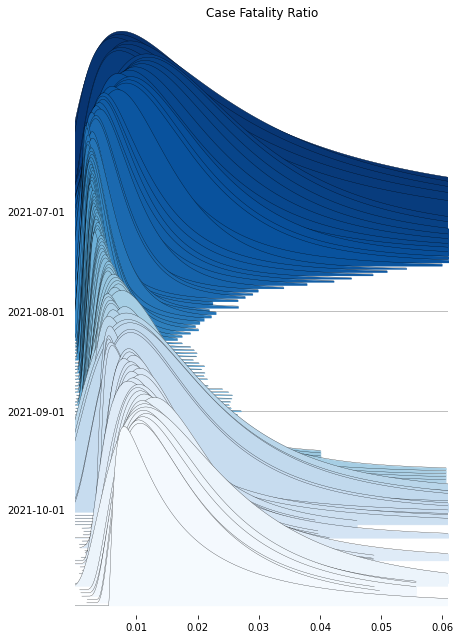

In [30]:
%matplotlib inline

CFR = pd.read_csv("https://raw.githubusercontent.com/leotac/joypy/master/data/CFR.csv",comment='#')
print(CFR.head())

# only create labels for the first day of each month to prevent crowding
labels = CFR['date'].unique()
for i in range(1,len(labels)):
    if labels[i].split('-')[2] != '01':
        labels[i] = None

# only plot non-zero ratios
zmask = CFR['ratio'] > 0
        
fig,axes = joypy.joyplot(CFR[zmask], by='date', column='ratio', labels = labels,
                       kind = 'lognorm', range_style='own', tails = 0.1, 
                       overlap = 4, x_range=[0.0,0.061], grid="y",
                       linewidth=0.25, figsize=(6.5,9.0),
                       title='Case Fatality Ratio',colormap=cm.Blues_r,
                       ylim = 'own', normalize = True, floc=None)

In [33]:
import numpy as np
np.random.seed(42)
df = pd.DataFrame(np.random.poisson(10,(24,7)))
df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df.head()


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12,6,11,14,7,8,9
1,11,8,10,7,11,11,8
2,12,6,7,8,10,5,3
3,9,13,8,6,13,12,13
4,9,14,8,8,12,15,13


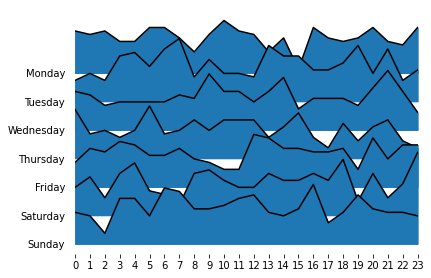

In [34]:
%matplotlib inline
x_range = list(range(24))
fig, axes = joypy.joyplot(df, kind="values", x_range=x_range)
axes[-1].set_xticks(x_range);

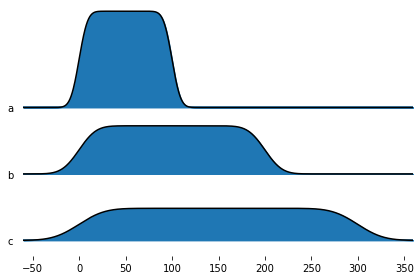

In [35]:
x = np.arange(0,100,0.1)
y =[n*x for n in range(1,4)]
fig, ax = joypy.joyplot(y, labels=["a","b","c"])

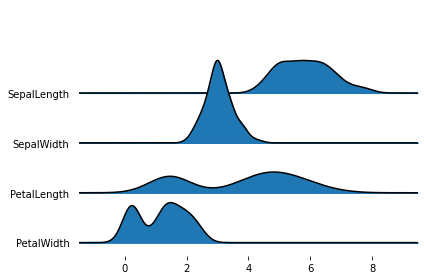

In [36]:
%matplotlib inline
fig, axes = joypy.joyplot(iris)

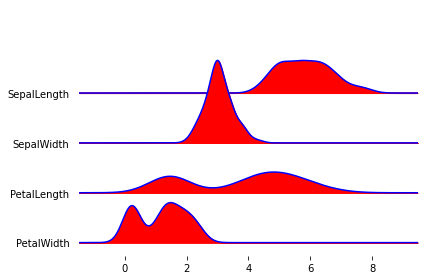

In [37]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, color="red", linecolor="blue")

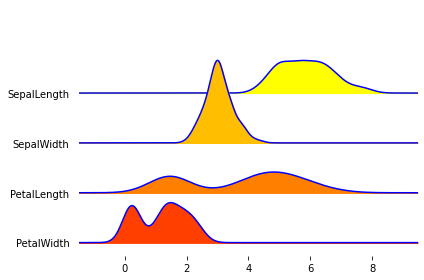

In [38]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, linecolor="blue", colormap=cm.autumn_r)

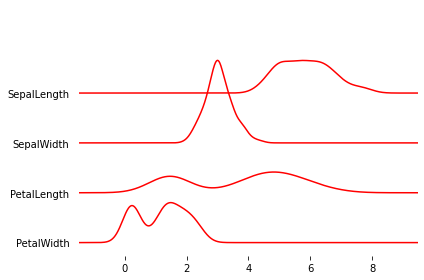

In [39]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, color="r")

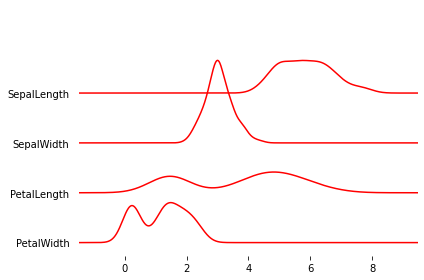

In [40]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r")

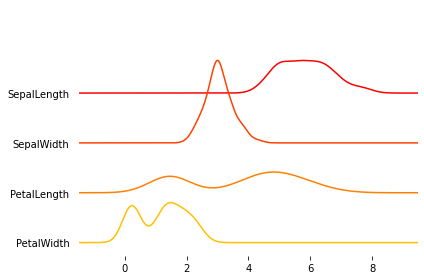

In [41]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=False, colormap=cm.autumn)

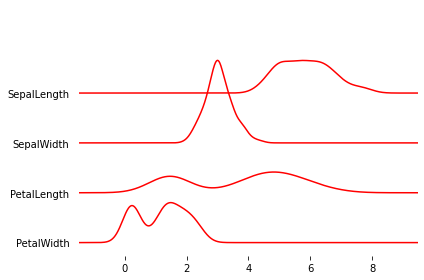

In [42]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r", color="g", colormap=cm.autumn)

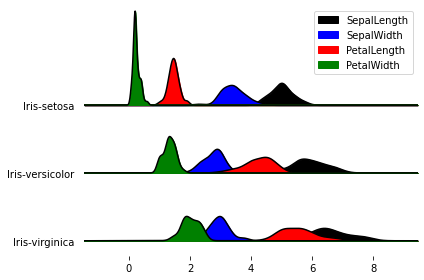

In [44]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=True, legend=True, by="Name", color=["k","b","r","g"])

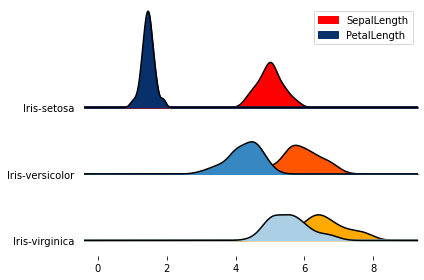

In [45]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=True, legend=True, by="Name", column=["SepalLength","PetalLength"],
                          colormap=[cm.autumn,cm.Blues_r])